# ROC Curves and AUC

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# read in the data
#data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/default.csv')
data = pd.read_csv('default-student.csv')
print(data.loc[(data.default==1)&(data.income>data.balance)])

      default student      balance       income
136         1     Yes  1486.998122  17854.39703
173         1     Yes  2205.799521  14271.49225
201         1     Yes  1774.694223  20359.50609
206         1      No  1889.599190  48956.17159
209         1     Yes  1899.390626  20655.20000
241         1     Yes  1572.856481  14930.17833
243         1      No  1964.476872  39054.58914
263         1      No  1530.353157  30003.81715
341         1      No  1642.819997  46856.94704
345         1      No  1991.649120  42133.37318
349         1      No  1550.449264  56273.51361
357         1      No  1328.892725  34710.06237
406         1      No  1700.599913  30488.98341
439         1     Yes  1118.701039  21848.44290
440         1      No  1119.097245  37224.56781
487         1      No  1981.451815  28127.89547
540         1      No  1717.071593  38408.89092
545         1      No  1465.210164  58699.98320
576         1      No  1763.579088  46227.07454
581         1     Yes  1770.969441  1597

## Model with One Feature

In [40]:
# create X and y
X = data[['balance']]
y = data.default

In [41]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# create logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# make predictions and calculate accuracy
y_pred = logreg.predict(X_test)
print(y_pred)
print (metrics.accuracy_score(y_test, y_pred))

[0 0 0 ..., 0 0 0]
0.9748


In [21]:
# calculate null accuracy rate
print (y_test.mean())
print (1 - y_test.mean())

0.0316
0.9684


In [44]:
# use a "dummy classifier" to calculate null accuracy rate
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_pred = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9684


In [45]:
# predict probability of default
y_prob = logreg.predict_proba(X_test)[:, 1]

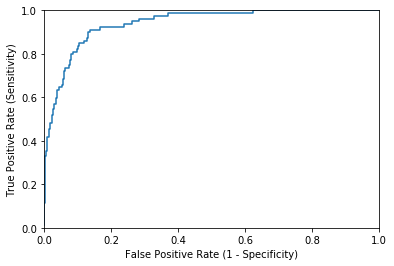

In [47]:
# plot ROC curve of logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
#fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [48]:
# calculate AUC
#print (metrics.roc_auc_score(y_test, y_prob))
print (metrics.average_precision_score(y_test, y_prob))

0.497157657794


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F92D51A6A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F92D75FDA0>], dtype=object)

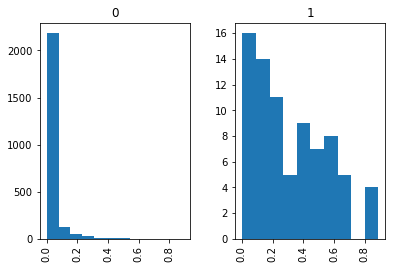

In [12]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame(data = {'probability':y_prob, 'actual':y_test})
df.probability.hist(by=df.actual, sharex=True)

## Model with Two Features

In [34]:
# compare to a model with an additional feature
X = data[['balance', 'income']]
y = data.default

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)

# calculate accuracy
y_pred = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9684


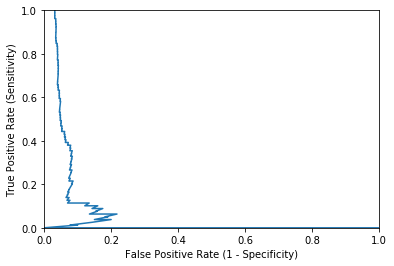

In [35]:
# predict probability of default
y_prob = logreg.predict_proba(X_test)[:, 1]

# plot ROC curve
fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [15]:
# calculate AUC
print (metrics.roc_auc_score(y_test, y_prob))

0.641794634501


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F92D77D4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F92DB5E828>], dtype=object)

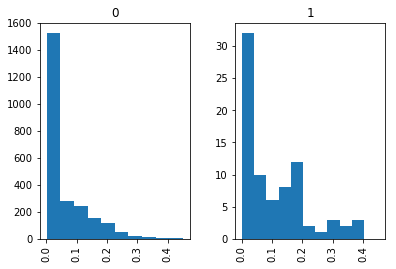

In [16]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame(data = {'probability':y_prob, 'actual':y_test})
df.probability.hist(by=df.actual, sharex=True)

# Exercise

1) Can you explain the results?
2) Use http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html 
   to calculate precision and recall curves.
3) Build a model with a third feature (student) and check its performance.
    

In [49]:
data['stu'] = data.student.map({'Yes':1, 'No':0})
X = data[['balance', 'stu']]
y = data.default

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)

# calculate accuracy
y_pred = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.974
